# Mount Google Drive
*   https://www.kaggle.com/code/manishthem/entity-recognition-for-ocr-using-text-data-xml/notebook
*   http://alexminnaar.com/2019/08/22/ner-rnns-tensorflow.html
*   https://github.com/yrnigam/Named-Entity-Recognition-NER-using-LSTMs/blob/master/Named_Entity_Recognition_(NER)_using_LSTMs.ipynb












In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data File OCR dan TIF yang Ada Di Dalam Direktori Google Drive kemudian masukkan dalam list

In [3]:
import os
DIREKTORI = '/content/drive/MyDrive/proB-ml/OCR/ImageAndXML_Data'
data_files = os.listdir(DIREKTORI)
# print(data_files)

Ambil file OCR dan file TIF. Masukkan dalam list

In [5]:
import fnmatch
file_ocr = []
file_tif = []
for file in data_files:
    if fnmatch.fnmatch(file,'*_ocr.xml'):
        file_ocr.append(file)    
        tif = file.replace("_ocr.xml",".tif")
        file_tif.append(tif)

Coba lihat pola yang ada dari file OCR 

In [6]:
# lihat data
idx = 0
file_ocr1 = open(DIREKTORI+"/"+file_ocr[idx])
print(file_ocr1.name)
print(file_tif[idx])
# print(file_ocr1.read())


/content/drive/MyDrive/proB-ml/OCR/ImageAndXML_Data/0060076201_ocr.xml
0060076201.tif


Coba lihat gambar dari salah satu file Invoice

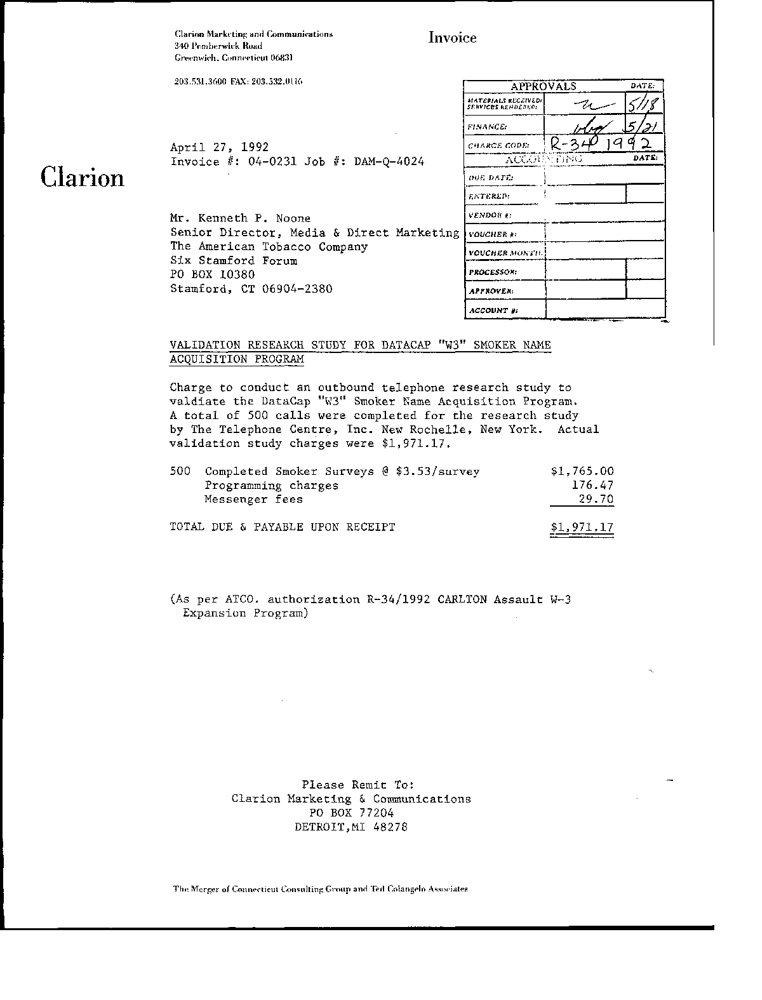

In [ ]:
# lihat gambar tif
from PIL import Image 
im = Image.open(DIREKTORI+"/"+file_tif[idx])
im

# Lakukan Iterasi di Dalam file XML. Kemudian ambil text yang penting

In [ ]:
from lxml import etree, objectify

parser = etree.XMLParser(remove_blank_text=True)
tree = etree.parse(os.path.join(DIREKTORI,file_ocr[0]))
root = tree.getroot()

for elem in root.getiterator():
    if not hasattr(elem.tag, 'find'): continue  
    i = elem.tag.find('}')
    if i >= 0:
        elem.tag = elem.tag[i+1:]
objectify.deannotate(root, cleanup_namespaces=True)

In [ ]:
tag_list = []
for element in root.iter():
    tag_list = element.tag

In [ ]:
import re
prev_block_Page = ''
prev_block_Block = ''
prev_block_Line = ''
prev_block_Word = ''
sentence = ''
sentence2 = ''
sentence3 = ''
block = []
line = []
for element in root.iter('Unicode'):
    same_page = same_block = same_line = next_word = False
    parent_node = next(element.iterancestors('Word'))
    block_list = parent_node.attrib['id'].split('_')
    if(prev_block_Page == block_list[0] or prev_block_Page == ''):
        same_page = True
    if(prev_block_Block == block_list[1] or prev_block_Block == ''):
        same_block = True        
    if(prev_block_Line == block_list[2] or prev_block_Line == ''):
        same_line = True
    if(prev_block_Word == int(block_list[3][1:])-1 or prev_block_Word == ''):
        next_word = True
                    
    #only same line present in one sentnece:
    #Here we check if the sentence contains the keywords which we are looking for like 'Date'
    if same_line and same_block:
        sentence3 = sentence3 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' ' 
    else:
        line.append(sentence3)
        sentence3 = ''
        sentence3 = sentence3 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text)+ ' '
    
    #same block in one line:
    if same_block:
        sentence = sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
    else:
        block.append(sentence)
        sentence = ''
        sentence = sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text)+ ' '  
      
    #all text in same line:
    sentence2 = sentence2 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
        
    prev_block_Page = block_list[0]
    prev_block_Block = block_list[1]
    prev_block_Line = block_list[2]
    prev_block_Word = int(block_list[3][1:])
print(line)
print(block)    
print(sentence2)

['Clonim Mirl linj  ini  a inmunicalmn  ', '340 IVmbrnrlrk Kuaii ', 'Crwm iHi  0 nm riirui P6K3  ', 'Invoice ', 'Clarion ', '2M MI 3600 FAX 203 332 0116 ', 'April 27, 1992 ', 'Invoice  : 04 0231 Job  : DAM Q 4024 ', 'Mr  Kenneth P  Noone ', 'Senior Director, Media   Direct Marketing ', 'The American Tobacco Company ', 'Six Stamford Forum ', 'P0 BOX 10380 ', 'Stamford, CT 06904 2380 ', 'APPROVALS ', 'DATE: ', 'mrtiiALt ', 'srtvrctt hr e K s ', 'sal ', 'FINANCCr ', ' r6 s ', 'zLL ', ' 7 IA C  C ODRi ', 'Ta ', 'ACC OL ', '  r  ', 'DATS i ', ' OF  bMtj ', 'f KTHFXto ', 'V f VOOlf  : ', '  j ', 'VOUCHERH ', '  ', 'vCVCtiCfi UOS  If  ', 'PROCESS : ', 'A r c vt  ', 'ACCOUNT H ', 'VALIDATION RESEARCH STUDY FOR DATACAP  W3  SMOKER NAME ', 'ACQUISITION PROGRAM ', 'Charge to conduct an outbound telephone research study to ', 'valdiate the DntaCap  W3  Smoker Name Acquisition Program  ', 'A total of 500 calls were completed for the research study ', 'by The Telephone Centre, Inc  New Rochelle, New

In [ ]:
filename = 'beautiful_data.txt'
write_txt_to_file = open(filename,'a')
write_txt_to_file.write(sentence2)
write_txt_to_file.close()

In [ ]:
import csv
field = ['TEXT']
row = sentence
filename = 'beautiful_data.csv'
with open(filename,'a',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)#creates an object for writing in csv files
    csvwriter.writerow(sentence)

In [ ]:
txt_filename = 'beautiful_data_summary.txt'
for xml_file in file_ocr:
    parser = None
    root = None
    tree = None
    new_sentence = ''
    parser = etree.XMLParser(remove_blank_text=True)
    xml_file_path = os.path.join(DIREKTORI,xml_file)
    tree = etree.parse(xml_file_path)
    root = tree.getroot()
    #remove the namespaces
    for elem in root.getiterator():
        if not hasattr(elem.tag, 'find'): continue  
        i = elem.tag.find('}')
        if i >= 0:
            elem.tag = elem.tag[i+1:]
    objectify.deannotate(root, cleanup_namespaces=True)
    
    for element in root.iter('Unicode'):
        new_sentence = new_sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
    #print('new_sentence = '+new_sentence)    
    #writing the new_sentence in the file 
    wrtie_txt_to_file = None
    write_txt_to_file = open(txt_filename,'a')
    write_txt_to_file.write(new_sentence)
    write_txt_to_file.write('\n')
    write_txt_to_file.close()

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth',3000)
df = pd.read_csv('./beautiful_data_summary.txt',delimiter='/n',header=None)
df.head(7)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0
0,"Clonim Mirl linj ini a inmunicalmn 340 IVmbrnrlrk Kuaii Crwm iHi 0 nm riirui P6K3 Invoice Clarion 2M MI 3600 FAX 203 332 0116 April 27, 1992 Invoice : 04 0231 Job : DAM Q 4024 Mr Kenneth P Noone Senior Director, Media Direct Marketing The American Tobacco Company Six Stamford Forum P0 BOX 10380 Stamford, CT 06904 2380 APPROVALS DATE: mrtiiALt srtvrctt hr e K s sal FINANCCr r6 s zLL 7 IA C C ODRi Ta ACC OL r DATS i OF bMtj f KTHFXto V f VOOlf : j VOUCHERH vCVCtiCfi UOS If PROCESS : A r c vt ACCOUNT H VALIDATION RESEARCH STUDY FOR DATACAP W3 SMOKER NAME ACQUISITION PROGRAM Charge to conduct an outbound telephone research study to valdiate the DntaCap W3 Smoker Name Acquisition Program A total of 500 calls were completed for the research study by The Telephone Centre, Inc New Rochelle, New York Actual validation study charges were 1,971 17 500 Completed Smoker Surveys S3 53 survey Programming charges Messenger fees S1 765 0C 176 47 29 70 TOTAL DUE PAYABLE UPON RECEIPT SI,971,17 As per ATCO authorization K 34 1992 CARLTON Assault W 3 Expansion Program Please Remit To: Clarion Marketing Communications PO BOX 77204 DETROIT,MI 48278 Thi Mcrf i of Cwtiwucut Con uhinp v Teil Ul"
1,"I DR GEORG B NEURATH Ver raosto 3Chur o BeraiunQ Philip Morris U S A P O Box 26603 Richmond, VA 23261 l i S A 2000H ewg56 Hex ntw te 32 TtfMoft 040 6I 60 0 December 9 1995 RECHNUNG 5 076 504 Syntheses of orgonlc compounds , th 4 quarter 13,750 00 Sl WXC 3 2 CO CO JO O MtfwlW eC i0S9ELZ JOCKO CO Vwarrtm n M two 1V034S B Z 2003000 2001213573"
2,"March 30, 1964 From: To: Attention: Statement of Chargos Professor T D Sterling College of Medicine Eden and Bethosda Avenues Cincinnati, Ohio Tobacco Industry Research Committee 150 East 42 Street New York 17, New York Dr R C Hockott Consultation, March 10, 1964 Airplane fare Hotel accomodation Taxis and food Honorarium 97 13 14 00 20 00 200 00 331 13 Review and Experimental Design Tea days at 200 per day 2000 00 Consultation with Dr Eugene Saenger 200 00 2200 00 TOTAL 2531 13"
3,"Laurence, Charles, Free Law on, Inc PLEASE REMIT PAYMENTS TO: LAUHENCE, CHARLES, FREE A LAWSON, INC P O BOX 19073, NEWARK, NJ 07195 0073 FOR NOU ES PHONE 1212 211 4 M WE AMERICAN TOBACCO COMPANY 13203 NORTH EROS CHURCH ROAD CHESTER, VIRGINIA 23831 8100 ATT: KAREN GAMMONS ACCT 006"
4,"HBI Healthy Buildings International Inc to Covington Burling 1201 Pennsylvania Avenue, N W Washington, D C 20044 10378 Democracy Lane Fairfax VA 22030 703 352 0102 Teleiax: 7031 352 0151 INVOICE NO CHOI52 DATE Aug 8, 1991 YOUR REF : John Rupp Juan Carlos Bermudez Brussels Sc Paris To the consulting services of our Mr Juan Carlos Bermudez in visiting Brussels meeting with Daniella Sartor and EEC Ccmmssion ref: building inspections and Paris meeting at 1 La Defense as per HBI Iberica Invoice 013 dated July 25, 1991 Consulting Three days at 1,000 per day 3,000 00 2 Exoenses Air fare, hotel and taxis 2,910 00 Total price now due for payment 5,910 00 For HBI Inc Grav Robertson GR:dh Enclosure 2029378157"
5,"M Microbiological Associates 4733 BETHESDA AVENUE A DIVISION OP hi t taker BETHESDA MARYLAND 20014 TELEPHONE: 301 654 3400 PLEASE REFER TO OUR INVOICE NUMBER ON ALL PAYMENTS AND CORRESPONDENCE CTR OCGO 21 SOLD TO The Council for Tobacco Research, USA, Inc 110 East 59th Street New York, New York 10022 Attn: Dr John Kreisher SHIPPED TO Mo Da Yr DISCOUNT OF A ON NET AMOUNT IF PAID WITHIN 20 DAYS AFTER SHIPPING OATE, NET 30 DAYS INVOICE DATE 111 76 CUSTOMER NUMBER CUSTOMER P O NUMBER CUST P O DATE DATE SHIPPED packTngslipno ORDER NC Mo Da Yr Mo Da j Yr i QUANTITY UNIT MEAS NET AMOUNT PRODUCT NO DESCRIPTION iis voucher represents monthly billing in :cordance with contrabt dated U 9 75 PERIOD: 12 1 75 thru 12 31 75 PERIOD AMOUNT CUMULATIVE 9 1,666 00 13,328 00 4 i FREIGHT CHARGES RATE TAX AMOUNT UNIT PRICE AMOUNT TOTAL AMOUNT DUE 1,666 00 DUPLICATE INVOICE FORM 9CO 003 3 REMIT IN U S CURRENCY ONLY X ID CTR CONTRACTS 018848"
6,"VIRGINIA POLYTECHNIC INSTITUTE AND ST

In [ ]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#https://www.dataknowsall.com/ner.html

tanggal_dict = {}
customer_dict = {}
company_dict = {}
for i in range(0, df.shape[0]):
  tanggal_list = []
  customer_list = []
  company_list = []
  text = df.iloc[i,:]
  doc = nlp(str(text))
  for ent in doc.ents:
      if ent.label_ == 'DATE':
          tanggal_list.append(ent.text)
      elif ent.label_ == 'PERSON':
          customer_list.append(ent.text)
      elif ent.label_ == 'ORG':
          company_list.append(ent.text)
  tanggal_dict[i] = date_list        
  customer_dict[i] = name_list  
  company_dict[i] = company_list 

In [ ]:
import pprint
# pprint.pprint(customer_name_dict)
pprint.pprint(customer_dict)

{0: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 1: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 2: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 3: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 4: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 5: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 6: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 7: ['John Rupp',
     'Juan Carlos Bermudez',
     'Rita Stark',
     'Juan Carlos Bermudez',
     'Gray Robertson CR'],
 8: ['John Rupp',
     '